In [13]:
#Importing required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [14]:
#Sigmoid function
def sigmoid(z):
    b = 1/(1 + np.exp(-z))
    return b

#To classify as 1 or 0
def classify(pred):
    prob=np.zeros((len(pred),1))
    for i in range(len(pred)):
        if(pred[i]>=0.5):
            prob[i]=1
        else:
            prob[i]=0
    return prob

#To predict for new values        
def predict(r,s):
    a=np.matmul(r,s)
    c=sigmoid(a)
    d=classify(c)
    return d

#To calculate Accuracy
def accuracy(confusion_matrix):
    diagonal_sum=confusion_matrix.trace()
    sum=confusion_matrix.sum()
    return(diagonal_sum/sum) 

#To calculate Precision
def precision(confusion_matrix):
    tp=confusion_matrix[0][0]
    sum=tp/(tp+confusion_matrix[0][1])
    return(sum) 

#To calculate Recall
def recall(confusion_matrix):
    tp=confusion_matrix[0][0]
    sum=tp/(tp+confusion_matrix[1][0])
    return(sum) 

In [15]:
#Updation of weights and gradient descent
def weight_update(theta, x_train, y_train, lr, bias_train,bias_valid, iterations,x_valid,y_valid):
    #theta:weights
    #x_train:training input
    #y_train:training lables
    #lr:learning rate
    #bias_train & bias_valid:bias 
    #iteration:epochs
    #x_valid:validation input
    #y_valid:validation lables
    cost_history = []
    val_loss=[]
    train_accuracy = []
    valid_accuracy = []
    n=len(x_train)
    j=0#Initializing cost as 0
    q=0#Initializing validation cost as 0
    q_len=len(x_valid)
    for epoch in range(iterations):
        r1=np.matmul(x_train, theta)#Multiplying input with weights
        a=sigmoid(r1)#To calculate sigmoid function of value
        r2=np.matmul(x_valid, theta)
        a2=sigmoid(r2)
        lg1=np.log(a)
        lg2=np.log(1-a)
        lg3=np.log(a2)
        lg4=np.log(1-a2)
        y_t_log=np.subtract(1,y_train)
        y_t_log2=np.subtract(1,y_valid)
        j= -(1/n) * ((np.matmul(y_train.transpose(),lg1)) + (np.matmul(y_t_log.transpose(),lg2)))#To calculate training loss 
        q= -(1/q_len) * ((np.matmul(y_valid.transpose(),lg3))+(np.matmul(y_t_log2.transpose(),lg4)))#To calculate validation loss
        val_loss.append(q)
        cost_history.append(j)#Appending cost to a variable
        grad_desc=np.zeros(len(theta))
        t=np.subtract(a,y_train)
        grad_desc=(1/n)*np.matmul((x_train).transpose(),t)#To calculate the gradients
        bias_desc=(1/n)*np.sum(t)#To calculate the bias
        grad_desc*=lr
        bias_desc*=lr
        theta=np.subtract(theta,grad_desc)#Changing of weights
        bias_train=np.subtract(bias_train,bias_desc)#Changing of bias
        bias_valid=np.subtract(bias_valid,bias_desc)
        x_train=x_train[:,1:31]
        x_train=np.hstack([bias_train,x_train])
        x_valid=x_valid[:,1:31]
        x_valid=np.hstack([bias_valid,x_valid])
        train_score=predict(x_train,theta)#To test training set
        valid_score=predict(x_valid,theta)#To test validation set
        c_m1=confusion_matrix(y_train, train_score)#Confusion Matrix of training set
        c_m2=confusion_matrix(y_valid, valid_score)#Confusion Matrix of test set
        train_acc=accuracy(c_m1)#Finding Accuracy of training set
        train_accuracy.append(train_acc)
        valid_acc=accuracy(c_m2)#Finding Accuracy of Validarion set
        valid_accuracy.append(valid_acc)
        print(" Epoch : %d ::: Training Loss = %f , Training Accuracy = %f, Validation Loss = %f , Validation Accuracy = %f" %(epoch,j,train_acc,q,valid_acc))

    #Plotting Training Accuracy & Loss and Validation Accuracy & Loss
    plt.figure(1)             
    plt.plot(train_accuracy)
    plt.title('Training Accuracy')
    plt.ylabel('Training_Accuracy')
    plt.xlabel('Epoch')

    plt.figure(2)             
    plt.plot(valid_accuracy)
    plt.title('Validation Accuracy')
    plt.ylabel('Validation_Accuracy')
    plt.xlabel('Epoch')
    
    plt.figure(3)             
    plt.plot(cost_history)
    plt.title('Training loss')
    plt.ylabel('Training_Loss')
    plt.xlabel('Epoch')

    plt.figure(4)             
    plt.plot(val_loss)
    plt.title('Validation loss')
    plt.ylabel('Validation_Loss')
    plt.xlabel('Epoch')

    return cost_history,theta,train_accuracy,bias_desc

C:\Users\Jayanth\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jayanth\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Jayanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.


 Epoch : 0 ::: Training Loss = 0.693147 , Training Accuracy = 0.927473, Validation Loss = 0.693147 , Validation Accuracy = 0.964912
 Epoch : 1 ::: Training Loss = 0.645787 , Training Accuracy = 0.929670, Validation Loss = 0.644861 , Validation Accuracy = 0.964912
 Epoch : 2 ::: Training Loss = 0.605578 , Training Accuracy = 0.929670, Validation Loss = 0.603366 , Validation Accuracy = 0.964912
 Epoch : 3 ::: Training Loss = 0.571233 , Training Accuracy = 0.929670, Validation Loss = 0.567539 , Validation Accuracy = 0.964912
 Epoch : 4 ::: Training Loss = 0.541657 , Training Accuracy = 0.929670, Validation Loss = 0.536408 , Validation Accuracy = 0.964912
 Epoch : 5 ::: Training Loss = 0.515960 , Training Accuracy = 0.931868, Validation Loss = 0.509165 , Validation Accuracy = 0.964912
 Epoch : 6 ::: Training Loss = 0.493435 , Training Accuracy = 0.931868, Validation Loss = 0.485154 , Validation Accuracy = 0.964912
 Epoch : 7 ::: Training Loss = 0.473527 , Training Accuracy = 0.934066, Vali

 Epoch : 81 ::: Training Loss = 0.191923 , Training Accuracy = 0.962637, Validation Loss = 0.166721 , Validation Accuracy = 0.964912
 Epoch : 82 ::: Training Loss = 0.191010 , Training Accuracy = 0.962637, Validation Loss = 0.165807 , Validation Accuracy = 0.964912
 Epoch : 83 ::: Training Loss = 0.190113 , Training Accuracy = 0.962637, Validation Loss = 0.164908 , Validation Accuracy = 0.964912
 Epoch : 84 ::: Training Loss = 0.189231 , Training Accuracy = 0.962637, Validation Loss = 0.164026 , Validation Accuracy = 0.964912
 Epoch : 85 ::: Training Loss = 0.188365 , Training Accuracy = 0.962637, Validation Loss = 0.163159 , Validation Accuracy = 0.964912
 Epoch : 86 ::: Training Loss = 0.187514 , Training Accuracy = 0.962637, Validation Loss = 0.162307 , Validation Accuracy = 0.964912
 Epoch : 87 ::: Training Loss = 0.186678 , Training Accuracy = 0.962637, Validation Loss = 0.161470 , Validation Accuracy = 0.964912
 Epoch : 88 ::: Training Loss = 0.185856 , Training Accuracy = 0.9626

 Epoch : 193 ::: Training Loss = 0.139592 , Training Accuracy = 0.967033, Validation Loss = 0.113843 , Validation Accuracy = 1.000000
 Epoch : 194 ::: Training Loss = 0.139348 , Training Accuracy = 0.967033, Validation Loss = 0.113590 , Validation Accuracy = 1.000000
 Epoch : 195 ::: Training Loss = 0.139107 , Training Accuracy = 0.967033, Validation Loss = 0.113339 , Validation Accuracy = 1.000000
 Epoch : 196 ::: Training Loss = 0.138867 , Training Accuracy = 0.967033, Validation Loss = 0.113091 , Validation Accuracy = 1.000000
 Epoch : 197 ::: Training Loss = 0.138630 , Training Accuracy = 0.967033, Validation Loss = 0.112844 , Validation Accuracy = 1.000000
 Epoch : 198 ::: Training Loss = 0.138394 , Training Accuracy = 0.967033, Validation Loss = 0.112598 , Validation Accuracy = 1.000000
 Epoch : 199 ::: Training Loss = 0.138160 , Training Accuracy = 0.967033, Validation Loss = 0.112355 , Validation Accuracy = 1.000000
 Epoch : 200 ::: Training Loss = 0.137928 , Training Accuracy 

 Epoch : 309 ::: Training Loss = 0.120118 , Training Accuracy = 0.973626, Validation Loss = 0.093195 , Validation Accuracy = 1.000000
 Epoch : 310 ::: Training Loss = 0.120001 , Training Accuracy = 0.973626, Validation Loss = 0.093069 , Validation Accuracy = 1.000000
 Epoch : 311 ::: Training Loss = 0.119885 , Training Accuracy = 0.973626, Validation Loss = 0.092943 , Validation Accuracy = 1.000000
 Epoch : 312 ::: Training Loss = 0.119770 , Training Accuracy = 0.973626, Validation Loss = 0.092817 , Validation Accuracy = 1.000000
 Epoch : 313 ::: Training Loss = 0.119655 , Training Accuracy = 0.973626, Validation Loss = 0.092692 , Validation Accuracy = 1.000000
 Epoch : 314 ::: Training Loss = 0.119541 , Training Accuracy = 0.973626, Validation Loss = 0.092568 , Validation Accuracy = 1.000000
 Epoch : 315 ::: Training Loss = 0.119428 , Training Accuracy = 0.973626, Validation Loss = 0.092444 , Validation Accuracy = 1.000000
 Epoch : 316 ::: Training Loss = 0.119315 , Training Accuracy 

 Epoch : 373 ::: Training Loss = 0.113676 , Training Accuracy = 0.973626, Validation Loss = 0.086126 , Validation Accuracy = 1.000000
 Epoch : 374 ::: Training Loss = 0.113590 , Training Accuracy = 0.973626, Validation Loss = 0.086029 , Validation Accuracy = 1.000000
 Epoch : 375 ::: Training Loss = 0.113503 , Training Accuracy = 0.973626, Validation Loss = 0.085934 , Validation Accuracy = 1.000000
 Epoch : 376 ::: Training Loss = 0.113417 , Training Accuracy = 0.973626, Validation Loss = 0.085838 , Validation Accuracy = 1.000000
 Epoch : 377 ::: Training Loss = 0.113331 , Training Accuracy = 0.973626, Validation Loss = 0.085743 , Validation Accuracy = 1.000000
 Epoch : 378 ::: Training Loss = 0.113246 , Training Accuracy = 0.973626, Validation Loss = 0.085648 , Validation Accuracy = 1.000000
 Epoch : 379 ::: Training Loss = 0.113161 , Training Accuracy = 0.973626, Validation Loss = 0.085554 , Validation Accuracy = 1.000000
 Epoch : 380 ::: Training Loss = 0.113077 , Training Accuracy 

 Epoch : 484 ::: Training Loss = 0.105819 , Training Accuracy = 0.975824, Validation Loss = 0.077291 , Validation Accuracy = 1.000000
 Epoch : 485 ::: Training Loss = 0.105761 , Training Accuracy = 0.975824, Validation Loss = 0.077225 , Validation Accuracy = 1.000000
 Epoch : 486 ::: Training Loss = 0.105703 , Training Accuracy = 0.975824, Validation Loss = 0.077159 , Validation Accuracy = 1.000000
 Epoch : 487 ::: Training Loss = 0.105646 , Training Accuracy = 0.975824, Validation Loss = 0.077094 , Validation Accuracy = 1.000000
 Epoch : 488 ::: Training Loss = 0.105589 , Training Accuracy = 0.975824, Validation Loss = 0.077028 , Validation Accuracy = 1.000000
 Epoch : 489 ::: Training Loss = 0.105532 , Training Accuracy = 0.975824, Validation Loss = 0.076963 , Validation Accuracy = 1.000000
 Epoch : 490 ::: Training Loss = 0.105475 , Training Accuracy = 0.975824, Validation Loss = 0.076898 , Validation Accuracy = 1.000000
 Epoch : 491 ::: Training Loss = 0.105418 , Training Accuracy 

 Epoch : 610 ::: Training Loss = 0.099735 , Training Accuracy = 0.975824, Validation Loss = 0.070269 , Validation Accuracy = 1.000000
 Epoch : 611 ::: Training Loss = 0.099695 , Training Accuracy = 0.975824, Validation Loss = 0.070222 , Validation Accuracy = 1.000000
 Epoch : 612 ::: Training Loss = 0.099655 , Training Accuracy = 0.975824, Validation Loss = 0.070175 , Validation Accuracy = 1.000000
 Epoch : 613 ::: Training Loss = 0.099615 , Training Accuracy = 0.975824, Validation Loss = 0.070128 , Validation Accuracy = 1.000000
 Epoch : 614 ::: Training Loss = 0.099575 , Training Accuracy = 0.975824, Validation Loss = 0.070081 , Validation Accuracy = 1.000000
 Epoch : 615 ::: Training Loss = 0.099535 , Training Accuracy = 0.975824, Validation Loss = 0.070034 , Validation Accuracy = 1.000000
 Epoch : 616 ::: Training Loss = 0.099495 , Training Accuracy = 0.975824, Validation Loss = 0.069988 , Validation Accuracy = 1.000000
 Epoch : 617 ::: Training Loss = 0.099455 , Training Accuracy 

 Epoch : 674 ::: Training Loss = 0.097342 , Training Accuracy = 0.975824, Validation Loss = 0.067459 , Validation Accuracy = 1.000000
 Epoch : 675 ::: Training Loss = 0.097307 , Training Accuracy = 0.975824, Validation Loss = 0.067418 , Validation Accuracy = 1.000000
 Epoch : 676 ::: Training Loss = 0.097273 , Training Accuracy = 0.975824, Validation Loss = 0.067378 , Validation Accuracy = 1.000000
 Epoch : 677 ::: Training Loss = 0.097238 , Training Accuracy = 0.975824, Validation Loss = 0.067337 , Validation Accuracy = 1.000000
 Epoch : 678 ::: Training Loss = 0.097204 , Training Accuracy = 0.978022, Validation Loss = 0.067297 , Validation Accuracy = 1.000000
 Epoch : 679 ::: Training Loss = 0.097170 , Training Accuracy = 0.978022, Validation Loss = 0.067256 , Validation Accuracy = 1.000000
 Epoch : 680 ::: Training Loss = 0.097136 , Training Accuracy = 0.978022, Validation Loss = 0.067216 , Validation Accuracy = 1.000000
 Epoch : 681 ::: Training Loss = 0.097101 , Training Accuracy 

 Epoch : 738 ::: Training Loss = 0.095276 , Training Accuracy = 0.980220, Validation Loss = 0.065012 , Validation Accuracy = 1.000000
 Epoch : 739 ::: Training Loss = 0.095245 , Training Accuracy = 0.980220, Validation Loss = 0.064977 , Validation Accuracy = 1.000000
 Epoch : 740 ::: Training Loss = 0.095215 , Training Accuracy = 0.980220, Validation Loss = 0.064941 , Validation Accuracy = 1.000000
 Epoch : 741 ::: Training Loss = 0.095185 , Training Accuracy = 0.980220, Validation Loss = 0.064905 , Validation Accuracy = 1.000000
 Epoch : 742 ::: Training Loss = 0.095156 , Training Accuracy = 0.980220, Validation Loss = 0.064870 , Validation Accuracy = 1.000000
 Epoch : 743 ::: Training Loss = 0.095126 , Training Accuracy = 0.980220, Validation Loss = 0.064834 , Validation Accuracy = 1.000000
 Epoch : 744 ::: Training Loss = 0.095096 , Training Accuracy = 0.980220, Validation Loss = 0.064799 , Validation Accuracy = 1.000000
 Epoch : 745 ::: Training Loss = 0.095066 , Training Accuracy 

 Epoch : 843 ::: Training Loss = 0.092422 , Training Accuracy = 0.982418, Validation Loss = 0.061602 , Validation Accuracy = 1.000000
 Epoch : 844 ::: Training Loss = 0.092397 , Training Accuracy = 0.982418, Validation Loss = 0.061573 , Validation Accuracy = 1.000000
 Epoch : 845 ::: Training Loss = 0.092373 , Training Accuracy = 0.982418, Validation Loss = 0.061543 , Validation Accuracy = 1.000000
 Epoch : 846 ::: Training Loss = 0.092348 , Training Accuracy = 0.982418, Validation Loss = 0.061514 , Validation Accuracy = 1.000000
 Epoch : 847 ::: Training Loss = 0.092324 , Training Accuracy = 0.982418, Validation Loss = 0.061485 , Validation Accuracy = 1.000000
 Epoch : 848 ::: Training Loss = 0.092299 , Training Accuracy = 0.982418, Validation Loss = 0.061455 , Validation Accuracy = 1.000000
 Epoch : 849 ::: Training Loss = 0.092275 , Training Accuracy = 0.982418, Validation Loss = 0.061426 , Validation Accuracy = 1.000000
 Epoch : 850 ::: Training Loss = 0.092251 , Training Accuracy 

 Epoch : 904 ::: Training Loss = 0.091001 , Training Accuracy = 0.982418, Validation Loss = 0.059893 , Validation Accuracy = 1.000000
 Epoch : 905 ::: Training Loss = 0.090979 , Training Accuracy = 0.982418, Validation Loss = 0.059866 , Validation Accuracy = 1.000000
 Epoch : 906 ::: Training Loss = 0.090957 , Training Accuracy = 0.982418, Validation Loss = 0.059840 , Validation Accuracy = 1.000000
 Epoch : 907 ::: Training Loss = 0.090935 , Training Accuracy = 0.982418, Validation Loss = 0.059813 , Validation Accuracy = 1.000000
 Epoch : 908 ::: Training Loss = 0.090913 , Training Accuracy = 0.982418, Validation Loss = 0.059787 , Validation Accuracy = 1.000000
 Epoch : 909 ::: Training Loss = 0.090891 , Training Accuracy = 0.982418, Validation Loss = 0.059760 , Validation Accuracy = 1.000000
 Epoch : 910 ::: Training Loss = 0.090870 , Training Accuracy = 0.982418, Validation Loss = 0.059734 , Validation Accuracy = 1.000000
 Epoch : 911 ::: Training Loss = 0.090848 , Training Accuracy 

 Epoch : 1019 ::: Training Loss = 0.088684 , Training Accuracy = 0.982418, Validation Loss = 0.057089 , Validation Accuracy = 1.000000
 Epoch : 1020 ::: Training Loss = 0.088666 , Training Accuracy = 0.982418, Validation Loss = 0.057067 , Validation Accuracy = 1.000000
 Epoch : 1021 ::: Training Loss = 0.088647 , Training Accuracy = 0.982418, Validation Loss = 0.057045 , Validation Accuracy = 1.000000
 Epoch : 1022 ::: Training Loss = 0.088629 , Training Accuracy = 0.982418, Validation Loss = 0.057023 , Validation Accuracy = 1.000000
 Epoch : 1023 ::: Training Loss = 0.088611 , Training Accuracy = 0.982418, Validation Loss = 0.057000 , Validation Accuracy = 1.000000
 Epoch : 1024 ::: Training Loss = 0.088592 , Training Accuracy = 0.982418, Validation Loss = 0.056978 , Validation Accuracy = 1.000000
 Epoch : 1025 ::: Training Loss = 0.088574 , Training Accuracy = 0.982418, Validation Loss = 0.056956 , Validation Accuracy = 1.000000
 Epoch : 1026 ::: Training Loss = 0.088556 , Training A

 Epoch : 1138 ::: Training Loss = 0.086669 , Training Accuracy = 0.982418, Validation Loss = 0.054640 , Validation Accuracy = 1.000000
 Epoch : 1139 ::: Training Loss = 0.086654 , Training Accuracy = 0.982418, Validation Loss = 0.054621 , Validation Accuracy = 1.000000
 Epoch : 1140 ::: Training Loss = 0.086638 , Training Accuracy = 0.982418, Validation Loss = 0.054603 , Validation Accuracy = 1.000000
 Epoch : 1141 ::: Training Loss = 0.086623 , Training Accuracy = 0.982418, Validation Loss = 0.054584 , Validation Accuracy = 1.000000
 Epoch : 1142 ::: Training Loss = 0.086607 , Training Accuracy = 0.982418, Validation Loss = 0.054565 , Validation Accuracy = 1.000000
 Epoch : 1143 ::: Training Loss = 0.086592 , Training Accuracy = 0.982418, Validation Loss = 0.054546 , Validation Accuracy = 1.000000
 Epoch : 1144 ::: Training Loss = 0.086576 , Training Accuracy = 0.982418, Validation Loss = 0.054527 , Validation Accuracy = 1.000000
 Epoch : 1145 ::: Training Loss = 0.086561 , Training A

 Epoch : 1260 ::: Training Loss = 0.084908 , Training Accuracy = 0.982418, Validation Loss = 0.052495 , Validation Accuracy = 1.000000
 Epoch : 1261 ::: Training Loss = 0.084895 , Training Accuracy = 0.982418, Validation Loss = 0.052479 , Validation Accuracy = 1.000000
 Epoch : 1262 ::: Training Loss = 0.084881 , Training Accuracy = 0.982418, Validation Loss = 0.052462 , Validation Accuracy = 1.000000
 Epoch : 1263 ::: Training Loss = 0.084868 , Training Accuracy = 0.982418, Validation Loss = 0.052446 , Validation Accuracy = 1.000000
 Epoch : 1264 ::: Training Loss = 0.084855 , Training Accuracy = 0.982418, Validation Loss = 0.052430 , Validation Accuracy = 1.000000
 Epoch : 1265 ::: Training Loss = 0.084841 , Training Accuracy = 0.982418, Validation Loss = 0.052414 , Validation Accuracy = 1.000000
 Epoch : 1266 ::: Training Loss = 0.084828 , Training Accuracy = 0.982418, Validation Loss = 0.052398 , Validation Accuracy = 1.000000
 Epoch : 1267 ::: Training Loss = 0.084815 , Training A

 Epoch : 1322 ::: Training Loss = 0.084107 , Training Accuracy = 0.982418, Validation Loss = 0.051520 , Validation Accuracy = 1.000000
 Epoch : 1323 ::: Training Loss = 0.084095 , Training Accuracy = 0.982418, Validation Loss = 0.051505 , Validation Accuracy = 1.000000
 Epoch : 1324 ::: Training Loss = 0.084083 , Training Accuracy = 0.982418, Validation Loss = 0.051490 , Validation Accuracy = 1.000000
 Epoch : 1325 ::: Training Loss = 0.084070 , Training Accuracy = 0.982418, Validation Loss = 0.051474 , Validation Accuracy = 1.000000
 Epoch : 1326 ::: Training Loss = 0.084058 , Training Accuracy = 0.982418, Validation Loss = 0.051459 , Validation Accuracy = 1.000000
 Epoch : 1327 ::: Training Loss = 0.084045 , Training Accuracy = 0.982418, Validation Loss = 0.051444 , Validation Accuracy = 1.000000
 Epoch : 1328 ::: Training Loss = 0.084033 , Training Accuracy = 0.982418, Validation Loss = 0.051429 , Validation Accuracy = 1.000000
 Epoch : 1329 ::: Training Loss = 0.084021 , Training A

 Epoch : 1385 ::: Training Loss = 0.083349 , Training Accuracy = 0.982418, Validation Loss = 0.050597 , Validation Accuracy = 1.000000
 Epoch : 1386 ::: Training Loss = 0.083338 , Training Accuracy = 0.982418, Validation Loss = 0.050583 , Validation Accuracy = 1.000000
 Epoch : 1387 ::: Training Loss = 0.083326 , Training Accuracy = 0.982418, Validation Loss = 0.050568 , Validation Accuracy = 1.000000
 Epoch : 1388 ::: Training Loss = 0.083314 , Training Accuracy = 0.982418, Validation Loss = 0.050554 , Validation Accuracy = 1.000000
 Epoch : 1389 ::: Training Loss = 0.083303 , Training Accuracy = 0.982418, Validation Loss = 0.050540 , Validation Accuracy = 1.000000
 Epoch : 1390 ::: Training Loss = 0.083291 , Training Accuracy = 0.982418, Validation Loss = 0.050526 , Validation Accuracy = 1.000000
 Epoch : 1391 ::: Training Loss = 0.083280 , Training Accuracy = 0.982418, Validation Loss = 0.050512 , Validation Accuracy = 1.000000
 Epoch : 1392 ::: Training Loss = 0.083268 , Training A

 Epoch : 1445 ::: Training Loss = 0.082673 , Training Accuracy = 0.982418, Validation Loss = 0.049774 , Validation Accuracy = 1.000000
 Epoch : 1446 ::: Training Loss = 0.082662 , Training Accuracy = 0.982418, Validation Loss = 0.049761 , Validation Accuracy = 1.000000
 Epoch : 1447 ::: Training Loss = 0.082651 , Training Accuracy = 0.982418, Validation Loss = 0.049748 , Validation Accuracy = 1.000000
 Epoch : 1448 ::: Training Loss = 0.082640 , Training Accuracy = 0.982418, Validation Loss = 0.049735 , Validation Accuracy = 1.000000
 Epoch : 1449 ::: Training Loss = 0.082630 , Training Accuracy = 0.982418, Validation Loss = 0.049721 , Validation Accuracy = 1.000000
 Epoch : 1450 ::: Training Loss = 0.082619 , Training Accuracy = 0.982418, Validation Loss = 0.049708 , Validation Accuracy = 1.000000
 Epoch : 1451 ::: Training Loss = 0.082608 , Training Accuracy = 0.982418, Validation Loss = 0.049695 , Validation Accuracy = 1.000000
 Epoch : 1452 ::: Training Loss = 0.082597 , Training A

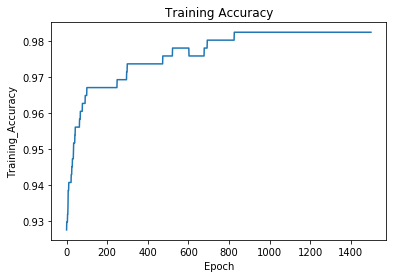

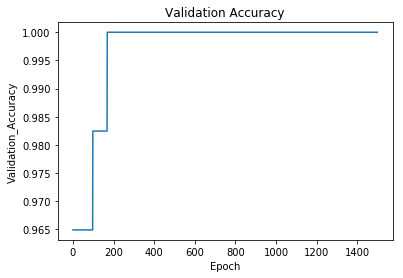

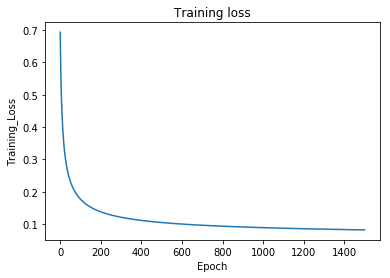

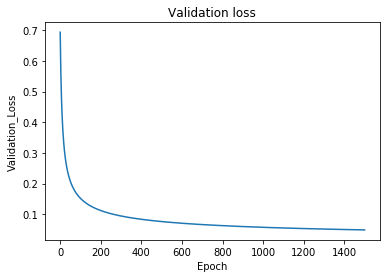

In [16]:
#Read dataset
dataset=pd.read_csv('data.csv', delimiter = ',', header=None)
data=dataset.iloc[:,1:32].values
df_data=pd.DataFrame(data)

#Encoding label Malign and Benign as 1 and 0 respectively
le=LabelEncoder()
data[:, 0] = le.fit_transform(data[:, 0])
df_data = pd.DataFrame(data)
    
#Spliting data into input=x and output=y
x=df_data.iloc[:,1:32]
y=df_data.iloc[:,0]
y=np.array(y)
y= y.astype(float)
    
#Spliting data into train and testing
x_t, x_test, y_t, y_test= train_test_split(x,y, test_size=0.1, random_state=1)
            
#Normalization
sc = StandardScaler()
x_t = sc.fit_transform(x_t)
x_test = sc.transform(x_test)
    
#Spliting x_t into train and validation
x_train, x_valid, y_train, y_valid= train_test_split(x_t, y_t, test_size=0.11, random_state=1)

#Initializing weights, learning rate and epochs
theta = np.zeros(len(x_t[0])+1);#Weight
lr=0.024#Learning Rate
itr=1500#No of epochs

#initialising bias
bias_train=np.ones([len(x_train),1])
x_train=np.hstack([bias_train,x_train])#Attaching bias term with training set
bias_test=np.ones([len(x_test),1])
x_test=np.hstack([bias_test,x_test])#Attaching bias term with test set
bias_valid=np.ones([len(x_valid),1])
x_valid=np.hstack([bias_valid,x_valid])#Attaching bias term with validation set

#Calling the core function
final=weight_update(theta,x_train, y_train, lr,bias_train, bias_valid, itr, x_valid,y_valid)
final_weights=final[1]#To fetch the weights after training
final_bias=final[3]#Bias
bias_test=np.subtract(bias_test,final_bias)#Changing of bias
x_test=x_test[:,1:31]
x_test=np.hstack([bias_test,x_test])
final_test=predict(x_test,final_weights)#Predict the output for test set
c_m1=confusion_matrix(y_test, final_test)#Confusion Matrix of testing set
test_acc=accuracy(c_m1)#Accuracy of test set
test_prec=precision(c_m1)#Precision of test set
test_recall=recall(c_m1)#Recall of test set
print("Testing Accuracy = %f , Testing Precision = %f, Testing Recall = %f" %(test_acc,test_prec,test_recall))#Final Output